### Universidad de Granada | ETSIIT


---
# **Práctica 0**: Introducción a OpenCV
---
**Asignatura:** Visión por Computador

**Autor:** Lugli, Valentino Glauco · YB0819879

## **Preámbulo**
### Añadiendo las librerías necesarias para realizar la práctica.


In [1]:
#   Give Google Colab Access to Google Drive
from google.colab import drive
drive.mount("/content/drive/")

#   Using Matplotlib to show images
import matplotlib.pyplot as plt
import matplotlib.colors as clr

#   Using OpenCV for everything else related to images.
import cv2 as cv

#   Using Numpy to manipulate images
import numpy as np

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---
##**Ejercicio 1** 


### Escribir una función que lea el fichero de una imagen y permita mostrarla tanto en grises como en color.




 Para la realización de este ejercicio, se utilizó la función `imread()` de la biblioteca OpenCV puesto es lo más directo y posee el parámetro que interesa para este ejercicio: que permita que una imagen sea leída en escala de grises (monobanda) como en colores (tribanda).
        
Esta función se incluye dentro de la función pedida `leeImagen(ruta, flagColor)`, donde el parámetro `flagColor` es un booleano indicando la manera en que se leerá la imagen, `True` o 1 para que sea en color y escala de grises de lo contrario.

In [2]:
def leeImagen(filename, flagColor):
    """
    Read an image from file.
    
    Parameters
    ----------
    filename : String
        Path to a valid image file.
    flagColor : Boolean
        Value indicating to read the image with RGB (True) or Grayscale (False).

    Returns
    -------
    Image (Numpy Array)
        The image

    """
    return cv.imread(filename, int(flagColor))

Para determinar si la imagen se ha leído, además de mostrarla, se puede utilizar `type()` para conocer que tipo de dato o clase es el objeto. 

Las imágenes que carga OpenCV son matrices de Numpy, y en efecto, si se han cargado correctamente se imprimirá que es de tipo  `<class 'numpy.ndarray'>`.

Adicionalmente se puede verificar que las dimensiones sean correctas con el atributo `shape` de esa matriz de Numpy, también se puede acceder a la matriz e imprimir rangos de valores.

Tipo de dato que es imageMessi: <class 'numpy.ndarray'>
Forma de imageDave: (487, 450)
¿Qué contiene imageLogo en un rango? 
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


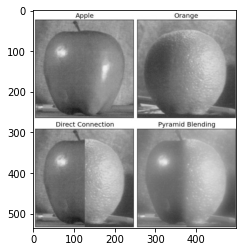

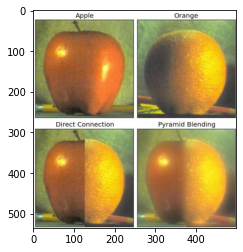

In [4]:
#   Path the test images.
srcOrapple = "/content/drive/MyDrive/Colab Notebooks/images/orapple.jpg"
srcMessi = "/content/drive/MyDrive/Colab Notebooks/images/messi.jpg"
srcLogo = "/content/drive/MyDrive/Colab Notebooks/images/logoOpenCV.jpg"
srcDave = "/content/drive/MyDrive/Colab Notebooks/images/dave.jpg"

#   Reading image as greyscale.
imageOrappleGrey = leeImagen(srcOrapple, False)
#   Now with colors.
imageOrappleColor = leeImagen(srcOrapple, True)

#   Rest of images
imageDave = leeImagen(srcDave, False)
imageMessi = leeImagen(srcMessi, False)
imageLogo = leeImagen(srcLogo, True)

# Checking that images are loaded
# - Check if the module name of the type matches with the name of the Numpy module.
if type(imageMessi).__module__ == np.__name__:
  print("Tipo de dato que es imageMessi: " + str(type(imageMessi)))
  print("Forma de imageDave: " + str(imageDave.shape))
  print("¿Qué contiene imageLogo en un rango? \n" + str(imageLogo[0:4,0:4,:]))


#  - Printing the Orapple, that was read as greyscale and color.

plt.figure("Orapple: Grey")
plt.imshow(imageOrappleGrey, cmap='gray')

plt.figure("Orapple: Color")
plt.imshow(imageOrappleColor[:,:,::-1])


---
##**Ejercicio 2** 


### Escribir una función que permita visualizar una matriz de números reales cualquiera/arbitraria, tanto monobanda como tribanda.



Para realizar este ejercicio se utilizará la librería Matplotlib para mostrar las imágenes, puesto que Google Colab tiene mejor compatibilidad que con OpenCV. Sin embargo, OpenCV y Numpy se utilizarán para el resto de operaciones de manipulación de las imágenes.

La función `pintaI(im, title=None)` acepta matrices de Numpy con números arbitrarios, ya sea a escala de grises (monobanda) o a color (tribanda): Para diferenciarlas, se utiliza la lontigud de la tupla `shape` de la matriz, puesto que las imágenes monobanda poseen solamente dos dimensiones en la tupla, mientras que las tribanda poseen tres, se asume que no se trabajará con matrices con otro número distinto de bandas.

*   Si es una imagen de escala de grises, se puede utilizar los parámetros que posee `imshow` para normalizar la imagen directamente, primero se indica que el mapa de color debe ser gris con `cmap='gray'` y luego se indica que debe normalizarse con `norm=clr.Normalize()`, que por defecto toma los valores máximos y mínimos de la imagen y linealmente normaliza los datos entre [0, 1], lo cual asegura que no se está perdiendo información.
*   Si es una imagen a color, entonces se realiza manualmente la normalización tomando cada valor de una celda, restandole el valor mínimo que posee la imagen y a esto se le divide la diferencia entre el valor máximo y mínimo. El resultado será el valor escalado entre [0, 1] sin pérdida de información. Una vez normalizado, para imprimir se invierte la última componente de la tupla puesto que OpenCV utiliza BGR para las imágenes, mientras que Matplotlib utiliza RGB.


Adicionalmente y por estética, se puede incluir un título a la imagen, aunque este es un parámetro totalmente opcional y para dibujar una imagen en una ventana diferente, se hace uso de la función `figure()` de Matplotlib.



In [5]:
def pintaI(im, title=None):
    """
    Print an arbitrary real number matrix

    Parameters
    ----------
    im : Numpy Array
        Arbitrary number matrix to be normalized and printed.
    title : String, optional
        Title of the image. The default is None.

    Returns
    -------
    None.

    """
    
    # Make each image appear on its own window with optional title.
    plt.figure(title)
    
    # Check if image is grayscale or RGB
    if len(im.shape) == 2:
        # Colormap it to grey and autonormalize values to between 0 and 1.
        plt.imshow(im, cmap='gray', norm=clr.Normalize())
    else:
        # Normalize the color channels to between 0 and 1.
        imAux = (im - np.min(im)) / (np.max(im) - np.min(im))
        # Show the image with the channels flipped since OpenCV reads in BGR and Matplotlib shows in RGB.
        plt.imshow(imAux[:,:,::-1])

Una vez escrita la función, se puede probar que la normalización está funcionando al generar dos matrices aleatorias con rangos fuera de [0, 1] o de [0, 255].

Adicionalmente, se crearon dos matrices más pequeñas con rangos arbitrarios para comprobar manualmente que se está normalizando correctamente.

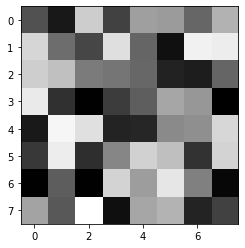

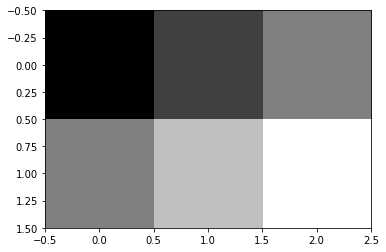

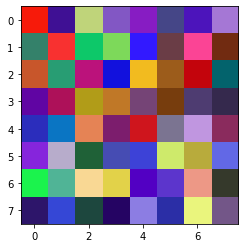

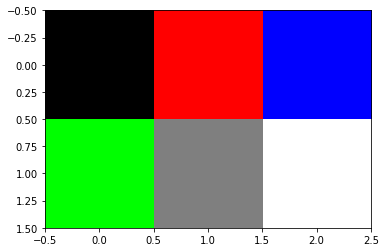

In [6]:
# Task 2: Visualize an arbitrary real number matrix
##########

#   Generating random matrices with different ranges
greyScaleMatrixRand = np.random.default_rng().uniform(-10.0, 220.0, (8,8))
colorMatrixRand = np.random.default_rng().uniform(-10.0, 16.0, (8,8,3))

#   Generating static matrices to check if everything is working correctly.
#   - This should be a gradient from black to gray to white.
greyScaleMatrixStatic = np.array([[-100, -50, 0],
                                  [0, 50, 100]])
#   - This should be: [[black, red, blue], [green, gray, white]]
colorMatrixStatic = np.array([[[-20, -20., -20],
                              [-20, -20, 20],
                              [20, -20, -20]],
                              [[-20, 20, -20],
                              [0, 0, 0],
                              [20, 20, 20]]])


#   Showing the matrices.
pintaI(greyScaleMatrixRand)
pintaI(greyScaleMatrixStatic)
pintaI(colorMatrixRand)
pintaI(colorMatrixStatic)

---
##**Ejercicio 3** 
## Escribir una función que visualice varias imágenes distintas a la vez.



Para realizar la función `pintaIM(vim, title=None)` se tomaron varias decisiones puesto que el planteamiento deja ciertos aspectos ambiguos:


*   Las imágenes son concatenadas de manera horizontal, de manera que la primera imagen del vector será la que esté en el extremo izquierdo y la última la que está al extremo derecho
*   Las imágenes no se redimensionan, por lo tanto, aquellas imágenes que no tengan la altura máxima, son rellenadas con color blanco verticalmente hasta llegar a la altura máxima.
*   La función acepta tanto imágenes de escala de grises como de colores, se creó una funcion adicional, `Gray2Color()` que convierte las imágenes de escala de grises a BGR, para poderlas concatenar sin problemas. Se utiliza la función `cvtColor()` que está diseñada para este propósito indicando la imagen fuente y la conversión, en este caso de escala de grises a BGR.
*   Acepta un título opcional.

Con esta aclaración, el funcionamiento del subprograma es el siguiente:

En primer lugar, se determina cual es la altura máxima, aquella de la imagen o imágenes con mayor dimensión vertical.

El proceso comienza con la primera imagen de la lista, si esta está en escala de grises, se convierte a BGR, y luego se asigna a la variable `strip` la cual contendrá todas las imágenes concatenadas, luego: 

*   Si tiene altura máxima, se asigna directamente a la variable  `strip`.
*   Si no, entonces se utiliza la función `copyMakeBorder()` la cual como indica su nombre genera una copia de la imagen con un borde añadido. La imagen resultante posee 0 bordes excepto por debajo, puesto que se quiere que las imágenes estén alineadas por el borde superior, por lo tanto el relleno es la diferencia de la altura máxima y la altura de la imagen. Se utiliza `cv.BORDER_CONSTANT` para indicar que se desea un color plano de borde, y la tupla al final indica que se rellenará con blanco.

Una vez finalizado esto, se comienza el bucle en el siguiente ítem del vector, donde se realizan las mismas operaciones descritas anteriormente con la adición de `hconcat`, que es para concatenar horizontalmente `strip` con la siguiente imagen `i` del vector.

Una vez finalizado, se dibuja la imagen.


In [8]:
# Auxiliar function
def Gray2Color(img):
    """
    Converts an Greyscale Image to BGR
    Parameters
    ----------
    img : Image (Numpy Array)
        The image in Grayscale.

    Returns
    -------
    Image (Numpy Array)
        The image converted to BGR.

    """
    return cv.cvtColor(img, cv.COLOR_GRAY2BGR)

def pintaIM(vim, title=None):
    """
    Print an horizontal list of images as one single picture.
    
    Parameters
    ----------
    vim : List of images
        A list containing images (Numpy Arrays), can be of any size and Grayscale or RGB.
    title : String, optional
        Title of the whole image. The default is None.

    Returns
    -------
    None.

    """
    # Padding color, in this case: white.
    color = (255, 255, 255)
    
    # Getting the maximum height of the list of images.
    maxHeight = max(i.shape[0] for i in vim)
    
    # This implementantions takes the biggest image and makes that the maximum height of the picture strip
    # therefore any image that is smaller than this height will be added in their original size, 
    # the rest of the space will be padded with a color, in this case, white.
    
    # Start to work on the first image, if it's grayscale convert it to BGR.
    if(len(vim[0].shape) == 2): vim[0] = Gray2Color(vim[0])   
    
    # If the image doesn't have the max height, add white padding vertically.
    if(vim[0].shape[0] != maxHeight):
        strip = cv.copyMakeBorder(vim[0], 0, maxHeight-vim[0].shape[0], 0, 0, cv.BORDER_CONSTANT, value=color)       
    else:
        strip = vim[0]
    
    # Repeat this process for the rest of the images vector.
    for i in vim[1:]:    

        # If grayscale, convert it to BGR.        
        if(len(i.shape) == 2): i = Gray2Color(i)
        
        # In adition to adding padding if needed, now concatenate horizontally the pictures.
        if(i.shape[0] != maxHeight):
            strip = cv.hconcat([strip, cv.copyMakeBorder(i, 0, maxHeight-i.shape[0], 0, 0, cv.BORDER_CONSTANT, value=color)])       
        else:
            strip = cv.hconcat([strip, i])

    # Once it's done, print the image strip as one picture.
    plt.figure()
    plt.imshow(strip[:,:,::-1])

Para probar esto, se creo un vector de Python y se añadieron imágenes, luego simplemente se llamó a la función.

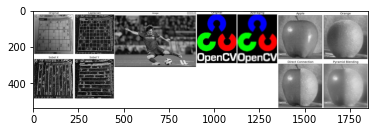

In [9]:
# Task 3: Concatenate multiple images into one
##########

#   Constructing an image vector
imageVector = []
imageVector.append(imageDave)
imageVector.append(imageMessi)
imageVector.append(imageLogo)
imageVector.append(imageOrappleGrey)

#   Showing the image vector as one picture.
pintaIM(imageVector)

---
##**Ejercicio 4**
### Escribir una función que modifique el color en la imagen de cada uno de los elementos de una lista de coordenadas de píxeles.

Para la realización de este ejercicio se creó la función `cambiarColor(imagen, listaPuntos, color)` con los parámetros que se pensaron son ideales para realizar lo pedido.
    
Puesto que se indica que la función reciba una lista de coordenadas, lo que realiza es tomar cada coordenada e ir reemplazando el color que posee con el color que deseado, comprobando que esta coordenada se encuentra dentro de los límites de la imagen.

Se tomó la decisión de aceptar imágenes en escala de grises, las cuales son convertidas a BGR como en el ejercicio anterior.

In [10]:
def cambiarColor(imagen, listaPuntos, color):
    """
    Changes the color of an image, given a list of points and a given color.
    
    Parameters
    ----------
    imagen : Image (Numpy Array)
        The base image to be modified.
    listaPuntos : Vector of 2D Numpy Arrays
        The list of points that are to be changed in color.
    color : 3D tuple
        The color to paint the image in the list of points.

    Returns
    -------
    imagen : Image (Numpy Array)
        Returns the modified image.

    """
    if(len(imagen.shape) == 2): imagen = Gray2Color(imagen)
    
    for coord in listaPuntos:
        if(0 <= coord[0] < imagen.shape[0] and 0 <= coord[1] < imagen.shape[1]):
            imagen[coord[0], coord[1], :] = color
        
    return imagen

Concretamente se pide dibujar un cuadrado de 100x100 píxeles, para generar los puntos primero se declaran las variables `xStart` y `yStart` las cuales son un sesgo: es el punto de inicio del cuadrado, y por lo tanto, es el punto que está 50 pixeles antes que el centro de la imagen en cada lado.

Luego en un bucle `for` anidado se rellena el vector generando matrices Numpy de dos componentes con el sesgo sumado al valor actual del índice que va de 0 a 100, resultando en un vector de 100x100 puntos centrado en la imagen, esto se le pasa como parámetro a la función junto con la imagen a modificar y el color indicado como una 3-tupla, la función luego retorna la imagen con la modificación realizada.

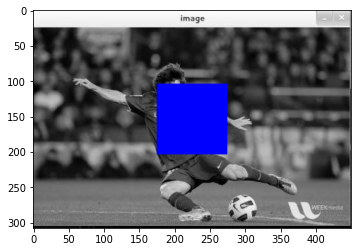

In [11]:
# Task 4: Change the pixels of an image given a list of coordinates.
##########
imagen = imageMessi
color = (255, 0, 0)

#   Generating the points: in this case a 100x100 square centered on the picture.
xStart = int(imagen.shape[0] / 2) - 50
yStart = int(imagen.shape[1] / 2) - 50

pointVector = []
for i in range(0, 100):
    for j in range (0, 100):
        pointVector.append(np.array([xStart+i, yStart+j])) 
    
#   Calling the function...
moddedImage = cambiarColor(imagen, pointVector, color)

#   ... and showing the image.
plt.figure("Messi")
plt.imshow(moddedImage[:,:,::-1])

---
##**Ejercicio 5**
## Una función que sea capaz de representar varias imágenes con sus títulos en una misma ventana.


Para este ejercicio se tomaron varias decisiones puesto que el planteamiento deja ciertos aspectos ambiguos:

*  Puesto que no se indican los parámetros del procedimiento, se tomó la decisión de utilizar un diccionario de Python como la estructura de datos que recibe la misma. El diccionario se compone del título de la imagen como clave y la imagen en sí como el valor.
*  Al igual que el ejercicio 3, se concatenarán las imágenes horizontalmente.
*  Se aceptarán imágenes en color y en escala de grises, utilizando nuevamente la función `Gray2Color()`.

Puesto que para mostrar imágenes se está utilizando Matplotlib, se utilizarán los métodos que posee. En primer lugar se crea un objeto `figure`, esto se puede pensar es la ventana en su totalidad.

Luego se determina la longitud del diccionario y prosigue un bucle `for` que recorre dicho diccionario, dentro del bucle se crea un `subplot`, el cual puede pensarse es una subdivisión de la ventana, se indica que será horizontalmente de la longitud del diccionario y se insertará cada imagen en el orden que viene en el diccionario, se añade llamando a la función `imshow()`, además se le añade el título con `title()`. Una vez se vuelve a llamar a `subplot()` se empezará a tratar otra subdivisión diferente.

Finalizado el bucle, se indica una opción de `tight_layout()` para espaciar mejor las imágenes y finalmente `show()` para dibujar la ventana con todas las imágenes y sus títulos.

In [12]:
def pintaIMVentana(dictIm):
    """
    Prints a series of images in the same window but each image has its own title.

    Parameters
    ----------
    dictIm : Dictionary of "Title : Image"
        Dictionary containg a Title that maps to an Image object (Numpy Array) to be printed.
indica
    Returns
    -------
    None.

    """
    # Get the size of the dictionary
    size = len(dictIm)
    
    # Setting the size of the window.
    fig = plt.figure(figsize=(10,4))

    # For each element in the dictionary...
    i = 1
    for element in dictIm:
        # ... add a subplot horizontally for each image; index 'i' is an identifier..
        fig.add_subplot(1, size, i)
        im = dictIm[element]
        # ...Add the image to the subplot, same prodecure as normal printing, ...
        if len(im.shape) == 2:
            plt.imshow(im, cmap='gray')
        else:
            plt.imshow(im[:,:,::-1])
        # ... Add the title...
        plt.title(element)
        # ... And update the identifier (just a counter, really).
        i+=1
      
    # Set up the layout.
    fig.tight_layout()
    # Show the image to screen.
    plt.show()
    

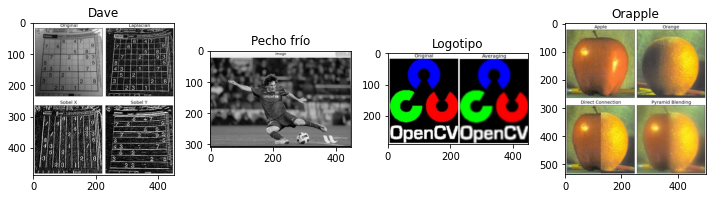

In [13]:
# Task 5: Show multiple images in a single window with their own titles.
##########

#   Setting up a dictionary to be used for the generation of each image.
imageDict = {"Dave" : imageDave, "Pecho frío" : imageMessi, "Logotipo" : imageLogo, "Orapple" : imageOrappleColor}
pintaIMVentana(imageDict)